Imports


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

Problem 1: Find Minimum of Convex Function


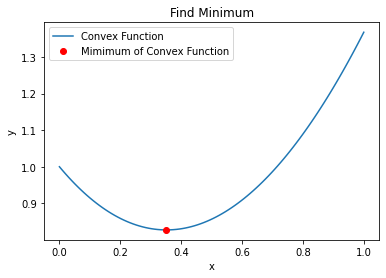

In [15]:
#procedure which determines the minimum of a convex function f in the interval [a, b] using “trisection" of the interval
def trisection(f, left, right, tol):
    while (right - left) > tol:
        middle = (left + right)/2
        lm = (left + middle)/2
        rm = (middle + right)/2
        if f(lm) < f(rm):
            right = rm
        else:
            left = lm
    return (left + right)/2



def f_convex(x):
    alpha = 1
    beta = 2
    return np.exp(-alpha*x)+np.power(x,beta)


a = 0
b = 1

tol = 0.0001
    
minimum = trisection(f_convex,a,b,tol)

x = np.linspace(0,1,100)
y = f_convex(x)
plt.plot(x,y)
plt.plot(minimum,f_convex(minimum),'ro')
plt.title("Find Minimum")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["Convex Function","Mimimum of Convex Function"])
plt.show()     

Problem 2: Bresenham Algorithm

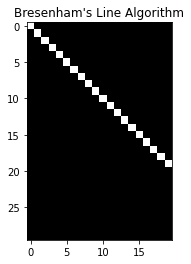

In [36]:
#create blank image
width = 20
height = 30
x = 0
y = 0
dx = width - x - 1
dy = height - y - 1
img = np.zeros((height,width,1), np.uint8)

errorXdx = 0
img[y,x] = 255
while x < width-1: 
    x = x + 1
    errorXdx = errorXdx + dy
    if errorXdx > dx/2:
        y = y + 1
        errorXdx = errorXdx - dx
    img[y,x] = 255
    plt.imshow(img, cmap='gray')
    plt.title("Bresenham's Line Algorithm")
    time.sleep(1.5)


# plt.imshow(img, cmap='gray')
# plt.title("Bresenham's Line Algorithm")

